<a href="https://colab.research.google.com/github/BaltiAhmed/TradingBot-LSTM/blob/main/LSTM_Scalping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- Import des librairies ---
%pip install pandas numpy matplotlib seaborn plotly tensorflow python-binance backtrader ta joblib openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Étape 1 – Chargement des données

In [3]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [4]:

import pandas as pd

# --- Charger ton fichier CSV (upload depuis ton PC vers Colab) ---
# from google.colab import files
# uploaded = files.upload()   # choisis "klines_BTCUSDT_1m_mainnet_last365days.csv"

# --- Lire le fichier CSV ---
df = pd.read_csv("klines_BTCUSDT_1m_mainnet_last365days.csv")

# --- Conversion de la date ---
df['open_time_utc'] = pd.to_datetime(df['open_time_utc'])

# --- Sélection des colonnes essentielles ---
df = df[['open_time_utc', 'open', 'high', 'low', 'close', 'volume']]

# --- Mettre l’horodatage comme index ---
df.set_index('open_time_utc', inplace=True)

# --- Conversion en float ---
df = df.astype(float)

# --- Aperçu ---
print("Shape:", df.shape)
print(df.head())
print(df.info())


Shape: (525600, 5)
                               open      high       low     close    volume
open_time_utc                                                              
2024-10-13 16:11:00+00:00  62279.25  62279.26  62272.54  62278.65   3.11370
2024-10-13 16:12:00+00:00  62278.64  62278.65  62278.62  62278.62   0.90092
2024-10-13 16:13:00+00:00  62278.63  62278.63  62278.62  62278.62   3.46890
2024-10-13 16:14:00+00:00  62278.62  62278.63  62274.64  62278.00   3.01594
2024-10-13 16:15:00+00:00  62278.00  62324.50  62278.00  62324.49  12.46947
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2024-10-13 16:11:00+00:00 to 2025-10-13 16:10:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    525600 non-null  float64
 1   high    525600 non-null  float64
 2   low     525600 non-null  float64
 3   close   525600 non-null  float64
 4   volume  525600 non-null  float64
dtypes: float64(5)
memory u

# Étape 2 – Exploration & Indicateurs techniques

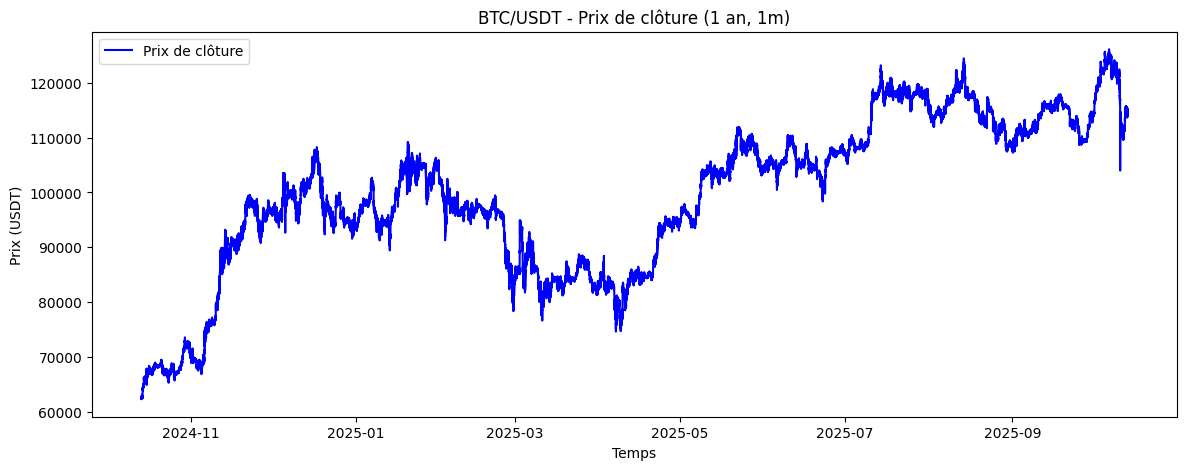

In [5]:
import matplotlib.pyplot as plt

# --- Tracer le prix de clôture sur 1 an ---
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue")
plt.title("BTC/USDT - Prix de clôture (1 an, 1m)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()


In [6]:
import numpy as np
import pandas as pd

# SMA (Simple Moving Average)
df["SMA_20"] = df["close"].rolling(window=20).mean()

# EMA (Exponential Moving Average)
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()

# RSI (Relative Strength Index, 14 périodes)
delta = df["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
df["RSI_14"] = 100 - (100 / (1 + rs))

# Bandes de Bollinger (20 périodes)
df["BB_middle"] = df["close"].rolling(window=20).mean()
df["BB_std"] = df["close"].rolling(window=20).std()
df["BB_upper"] = df["BB_middle"] + 2*df["BB_std"]
df["BB_lower"] = df["BB_middle"] - 2*df["BB_std"]

# Vérification
print(df.tail(5))


                                open       high        low      close  \
open_time_utc                                                           
2025-10-13 16:06:00+00:00  114594.53  114694.91  114575.68  114635.76   
2025-10-13 16:07:00+00:00  114635.77  114721.15  114634.09  114708.21   
2025-10-13 16:08:00+00:00  114708.21  114974.01  114691.00  114903.41   
2025-10-13 16:09:00+00:00  114903.41  115034.71  114903.40  114956.07   
2025-10-13 16:10:00+00:00  114956.07  115034.69  114954.79  114985.55   

                             volume       SMA_20         EMA_20  RSI_14  \
open_time_utc                                                             
2025-10-13 16:06:00+00:00  28.23227  114448.1730  114446.182652     NaN   
2025-10-13 16:07:00+00:00  27.27103  114462.8255  114471.137637     NaN   
2025-10-13 16:08:00+00:00  38.14020  114489.4310  114512.306434     NaN   
2025-10-13 16:09:00+00:00  31.08170  114510.6745  114554.569631     NaN   
2025-10-13 16:10:00+00:00  12.98936  1

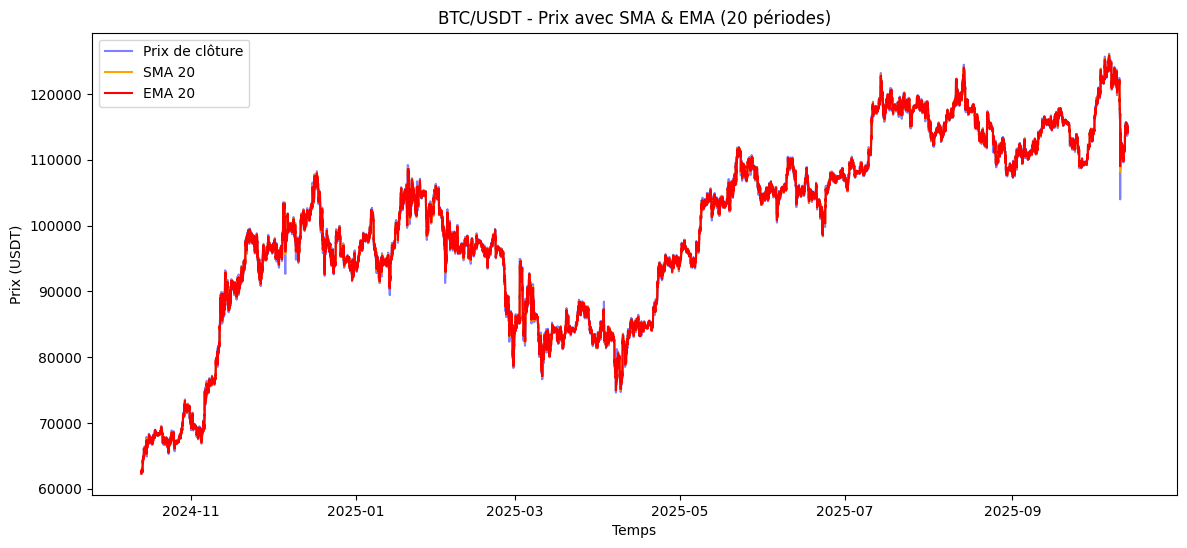

In [7]:
# --- Visualisation SMA & EMA sur les prix ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['SMA_20'], label="SMA 20", color="orange")
plt.plot(df.index, df['EMA_20'], label="EMA 20", color="red")
plt.title("BTC/USDT - Prix avec SMA & EMA (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [8]:
%pip install ta


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


                               close     RSI_14
open_time_utc                                  
2025-10-13 15:51:00+00:00  114578.58  62.005459
2025-10-13 15:52:00+00:00  114458.36  54.700395
2025-10-13 15:53:00+00:00  114380.50  50.546924
2025-10-13 15:54:00+00:00  114359.89  49.475988
2025-10-13 15:55:00+00:00  114332.43  48.016285
2025-10-13 15:56:00+00:00  114336.25  48.245039
2025-10-13 15:57:00+00:00  114407.67  52.457407
2025-10-13 15:58:00+00:00  114383.99  50.975960
2025-10-13 15:59:00+00:00  114312.10  46.667106
2025-10-13 16:00:00+00:00  114282.32  44.971313
2025-10-13 16:01:00+00:00  114424.66  53.642338
2025-10-13 16:02:00+00:00  114421.42  53.435934
2025-10-13 16:03:00+00:00  114519.38  58.620192
2025-10-13 16:04:00+00:00  114602.67  62.448379
2025-10-13 16:05:00+00:00  114594.53  61.846189
2025-10-13 16:06:00+00:00  114635.76  63.752794
2025-10-13 16:07:00+00:00  114708.21  66.884388
2025-10-13 16:08:00+00:00  114903.41  73.521882
2025-10-13 16:09:00+00:00  114956.07  74

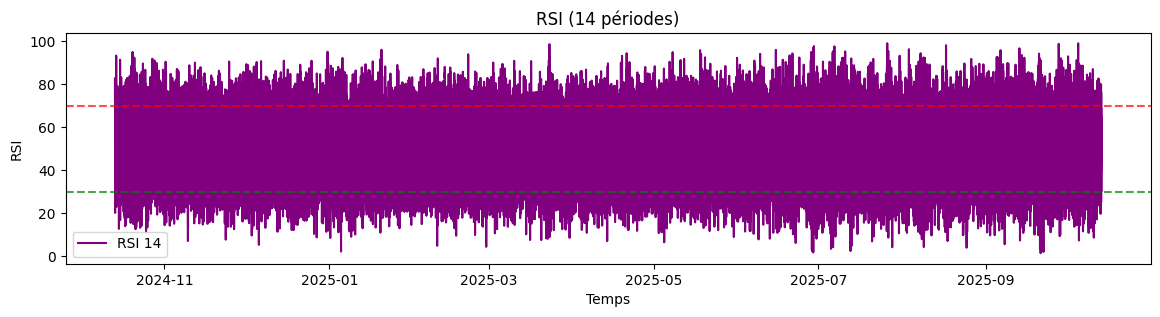

In [9]:
import ta

# RSI avec la librairie ta
df["RSI_14"] = ta.momentum.RSIIndicator(df["close"], window=14).rsi()

# Vérification rapide
print(df[["close", "RSI_14"]].tail(20))

# Nouveau tracé
plt.figure(figsize=(14,3))
plt.plot(df.index, df['RSI_14'], label="RSI 14", color="purple")
plt.axhline(70, linestyle="--", color="red", alpha=0.7)   # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.7) # Survente
plt.title("RSI (14 périodes)")
plt.xlabel("Temps")
plt.ylabel("RSI")
plt.legend()
plt.show()


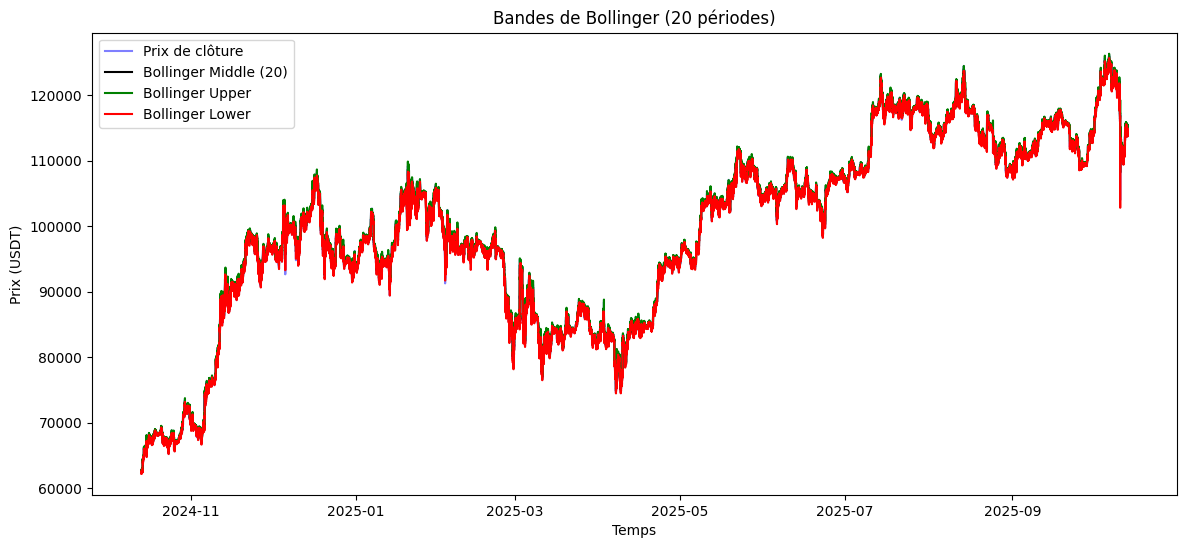

In [10]:
# --- Visualisation Bandes de Bollinger ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['BB_middle'], label="Bollinger Middle (20)", color="black")
plt.plot(df.index, df['BB_upper'], label="Bollinger Upper", color="green")
plt.plot(df.index, df['BB_lower'], label="Bollinger Lower", color="red")
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color="gray", alpha=0.1)
plt.title("Bandes de Bollinger (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [11]:
import ta

# === Ajout des indicateurs directionnels ===
macd = ta.trend.MACD(df['close'])
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_hist'] = macd.macd_diff()

adx = ta.trend.ADXIndicator(df['high'], df['low'], df['close'], window=14)
df['adx'] = adx.adx()

sto = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3)
df['sto_k'] = sto.stoch()
df['sto_d'] = sto.stoch_signal()

atr = ta.volatility.AverageTrueRange(df['high'], df['low'], df['close'], window=14)
df['atr_14'] = atr.average_true_range()

# Nettoyage
df.fillna(method='bfill', inplace=True)
df.fillna(0, inplace=True)


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_6176\2071153610.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

# # 🆕 Sauvegarde en CSV (version enrichie)
# df.to_csv("/content/drive/MyDrive/BTC_1m_preprocessed_v2.csv", index=False)

# # 🆕 Sauvegarde en Pickle (plus rapide à recharger)
# df.to_pickle("/content/drive/MyDrive/BTC_1m_preprocessed_v2.pkl")

# print("✅ Nouveau dataset enrichi sauvegardé sous : BTC_1m_preprocessed_v2.csv et .pkl")

In [13]:
# import pandas as pd
# df = pd.read_pickle("/content/drive/MyDrive/BTC_1m_preprocessed_v2.pkl")
# print(df.shape)
# df.head()


# Étape 3 – Prétraitement

In [14]:
# Création des df_features,on garde uniquement les colonnes utiles pour l'entraînement
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]
df_features = df[features].dropna().copy()  # dropna car indicateurs techniques au début sont NaN

print("Shape après sélection :", df_features.shape)
df_features.head()


Shape après sélection : (525600, 18)


,open,high,low,close,volume,EMA_20,RSI_14,BB_middle,BB_std,BB_upper,BB_lower,macd,macd_signal,macd_hist,adx,sto_k,sto_d,atr_14
open_time_utc,,,,,,,,,,,,,,,,,,
2024-10-13 16:11:00+00:00,62279.25,62279.26,62272.54,62278.65,3.11370,62278.650000,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:12:00+00:00,62278.64,62278.65,62278.62,62278.62,0.90092,62278.647143,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:13:00+00:00,62278.63,62278.63,62278.62,62278.62,3.46890,62278.644558,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:14:00+00:00,62278.62,62278.63,62274.64,62278.00,3.01594,62278.583171,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:15:00+00:00,62278.00,62324.50,62278.00,62324.49,12.46947,62282.955250,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0


In [15]:
# --- Labeling : définition Buy / Hold / Sell ---

horizon = 10         # minutes à prévoir
threshold = 0.002     # 0.2%

# Colonnes utiles pour le modèle
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]

df_features = df.copy()

# 1️⃣ Calcul du prix futur (bien aligné avec df_features)
df_features["future_close"] = df_features["close"].shift(-horizon)

# 2️⃣ Calcul du rendement futur (propre)
df_features["future_return"] = (df_features["future_close"] - df_features["close"]) / df_features["close"]

# 3️⃣ Label = -1 / 0 / 1
df_features["label"] = 0  # Hold par défaut

df_features.loc[df_features["future_return"] >  threshold, "label"] = 1   # Buy
df_features.loc[df_features["future_return"] < -threshold, "label"] = -1  # Sell

# 4️⃣ Remapping vers 0 / 1 / 2 pour Keras
label_mapping = {-1: 0, 0: 1, 1: 2}
df_features["label"] = df_features["label"].map(label_mapping)

# 5️⃣ Supprimer les lignes sans future_close
df_features = df_features.dropna()

# 6️⃣ On ne garde que features + label
df_features = df_features[features + ["label"]]

print(df_features["label"].value_counts())
df_features.head(15)

label
1    426565
2     50495
0     48530
Name: count, dtype: int64


,open,high,low,close,volume,EMA_20,RSI_14,BB_middle,BB_std,BB_upper,BB_lower,macd,macd_signal,macd_hist,adx,sto_k,sto_d,atr_14,label
open_time_utc,,,,,,,,,,,,,,,,,,,
2024-10-13 16:11:00+00:00,62279.25,62279.26,62272.54,62278.65,3.11370,62278.650000,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:12:00+00:00,62278.64,62278.65,62278.62,62278.62,0.90092,62278.647143,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:13:00+00:00,62278.63,62278.63,62278.62,62278.62,3.46890,62278.644558,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:14:00+00:00,62278.62,62278.63,62274.64,62278.00,3.01594,62278.583171,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:15:00+00:00,62278.00,62324.50,62278.00,62324.49,12.46947,62282.955250,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:16:00+00:00,62324.50,62324.50,62306.00,62312.42,6.48612,62285.761417,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,2
2024-10-13 16:17:00+00:00,62312.42,62356.00,62312.42,62355.01,9.51800,62292.356520,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,1
2024-10-13 16:18:00+00:00,62355.01,62430.04,62355.00,62430.04,27.52005,62305.469232,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,1
2024-10-13 16:19:00+00:00,62430.04,62476.22,62426.00,62450.26,34.99775,62319.258829,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,1


In [16]:
# transformer les données en séquences pour LSTM.
import numpy as np

# Paramètres
seq_len = 20  # taille de la fenêtre temporelle
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]
# On convertit en numpy pour accélérer
data = df_features[features].values
labels = df_features["label"].values

X, y = [], []

for i in range(len(data) - seq_len):
    X.append(data[i:i+seq_len])   # séquence de 20 bougies
    y.append(labels[i+seq_len])   # label associé à la fin de la séquence

X = np.array(X)
y = np.array(y)

print("Shape X :", X.shape)  # (nb_samples, 20, nb_features)
print("Shape y :", y.shape)  # (nb_samples,)


Shape X : (525570, 20, 18)
Shape y : (525570,)


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Etape 4 : préparation du dataset pour LSTM.

In [18]:
from sklearn.preprocessing import StandardScaler

# Découpagedes données train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False  # respect de la chronologie
)

print("Shapes après split :")
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)

print("\nRépartition des classes (avant oversampling) :")
print("Train :", np.bincount(y_train))
print("Test  :", np.bincount(y_test))


Shapes après split :
X_train : (420456, 20, 18) y_train : (420456,)
X_test : (105114, 20, 18) y_test : (105114,)

Répartition des classes (avant oversampling) :
Train : [ 43106 332477  44873]
Test  : [ 5424 94081  5609]


In [19]:
import numpy as np

def downsample_hold_class(X, y, hold_label=1, ratio=1.3, random_state=42):
    """Réduit la classe Hold pour limiter le déséquilibre."""
    rng = np.random.default_rng(random_state)
    y = np.asarray(y)
    hold_idx = np.where(y == hold_label)[0]
    other_idx = np.where(y != hold_label)[0]

    if len(other_idx) == 0:
        print("Impossible de downsampler : aucune autre classe disponible.")
        return X, y

    minority = np.max(np.bincount(y[y != hold_label]))
    max_hold = int(ratio * minority)

    if len(hold_idx) <= max_hold:
        print("Pas de downsampling : Hold déjà <= seuil.")
        return X, y

    keep_hold_idx = rng.choice(hold_idx, size=max_hold, replace=False)
    keep_idx = np.sort(np.concatenate([other_idx, keep_hold_idx]))

    print(f"Downsampling Hold : {len(hold_idx)} -> {max_hold}")
    return X[keep_idx], y[keep_idx]


X_train_down, y_train_down = downsample_hold_class(
    X_train, y_train,
    ratio=1.3,
    random_state=42
)

X_train = X_train_down
y_train = y_train_down

unique_ds, counts_ds = np.unique(y_train, return_counts=True)
print("Distribution après downsampling :", dict(zip(unique_ds, counts_ds)))



Downsampling Hold : 332477 -> 58334
Distribution après downsampling : {np.int64(0): np.int64(43106), np.int64(1): np.int64(58334), np.int64(2): np.int64(44873)}


In [20]:

# --- transformations de base ---
def jitter(seq, sigma=0.001):
    """Multiplicative gaussian jitter : seq * (1 + N(0,sigma))"""
    noise = np.random.normal(loc=0.0, scale=sigma, size=seq.shape)
    return seq * (1.0 + noise)

def scaling_seq(seq, scale_sigma=0.002):
    """Small multiplicative scaling factor"""
    factor = np.random.normal(loc=1.0, scale=scale_sigma)
    return seq * factor

def time_roll(seq, max_shift=2):
    """Conservative time-warp by small rolling (pad with edge values)"""
    s = seq.copy()
    shift = np.random.randint(-max_shift, max_shift+1)
    if shift == 0:
        return s
    if shift > 0:
        pad = np.repeat(s[0:1, :], shift, axis=0)
        return np.vstack([pad, s[:-shift, :]])
    else:
        pad = np.repeat(s[-1:, :], -shift, axis=0)
        return np.vstack([s[-shift:, :], pad])

def augment_sequence(seq, methods=("jitter","scaling"), jitter_sigma=0.001, scaling_sigma=0.002):
    x = seq.copy()
    for m in methods:
        if m == "jitter":
            x = jitter(x, sigma=jitter_sigma)
        elif m == "scaling":
            x = scaling_seq(x, scale_sigma=scaling_sigma)
        elif m == "roll":
            x = time_roll(x, max_shift=1)
    return x


In [21]:

# Paramètres d'augmentation — ajuste si besoin
target_ratio = 1.0   # produire au plus target_ratio * majority_count par classe minoritaire
methods = ("jitter","scaling")  # méthodes à combiner
jitter_sigma = 0.002
scaling_sigma = 0.002
random_state = 42
np.random.seed(random_state)

# Comptes actuels (après downsampling)
unique, counts = np.unique(y_train, return_counts=True)
counts_dict = dict(zip(unique, counts))
majority = max(counts)
print("Distribution train avant augmentation:", counts_dict, "majority =", majority)

# On génère jusqu'à desired_count = int(target_ratio * majority)
desired = int(target_ratio * majority)

X_aug_list = [X_train]   # contiendra blocs à concat
y_aug_list = [y_train]

for cls in sorted(unique):
    if cls == 1:  # skip Hold (classe majoritaire)
        continue
    idxs = np.where(y_train == cls)[0]
    n_current = len(idxs)
    if n_current >= desired:
        print(f"Classe {cls} déjà >= desired ({n_current} >= {desired}), pas d'augmentation.")
        continue

    needed = desired - n_current
    print(f"Augmenter classe {cls} : {n_current} → {desired} (ajout de {needed} seq)")

    for _ in range(needed):
        pick = np.random.choice(idxs)
        seq = X_train[pick]
        # appliquer une transformation aléatoire
        new_seq = augment_sequence(seq, methods=methods, jitter_sigma=jitter_sigma, scaling_sigma=scaling_sigma)
        X_aug_list.append(new_seq[np.newaxis, ...])
        y_aug_list.append(np.array([cls]))

# concatner tout
X_train_aug = np.vstack([np.atleast_2d(x) for x in X_aug_list])
y_train_aug = np.hstack(y_aug_list)

# shuffle
perm = np.random.RandomState(random_state).permutation(len(y_train_aug))
X_train_aug = X_train_aug[perm]
y_train_aug = y_train_aug[perm]

unique2, counts2 = np.unique(y_train_aug, return_counts=True)
print("Distribution train après augmentation :", dict(zip(unique2, counts2)))


Distribution train avant augmentation: {np.int64(0): np.int64(43106), np.int64(1): np.int64(58334), np.int64(2): np.int64(44873)} majority = 58334
Augmenter classe 0 : 43106 → 58334 (ajout de 15228 seq)
Augmenter classe 2 : 44873 → 58334 (ajout de 13461 seq)
Distribution train après augmentation : {np.int64(0): np.int64(58334), np.int64(1): np.int64(58334), np.int64(2): np.int64(58334)}


In [22]:
# ⚠️ Normalisation : on scale seulement sur le TRAIN pour éviter data leakage(toutes les colonnes doivent être sur la même échelle)
from sklearn.preprocessing import StandardScaler
scalers = []
X_train_scaled = np.zeros_like(X_train_aug)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train_aug.shape[2]):  # pour chaque feature
    scaler = StandardScaler()
    # on doit aplatir la dimension temps pour fit_transform per-feature across samples & timesteps
    # mais comme on faisait avant feature-wise sur la 2D (samples, timesteps)
    X_train_scaled[:, :, i] = scaler.fit_transform(X_train_aug[:, :, i])
    # transformer test (attention : test n'a pas été augmenté)
    X_test_scaled[:, :, i] = scaler.transform(X_test[:, :, i])
    scalers.append(scaler)

print("✅ Normalisation sur données augmentées terminée")
print("X_train_scaled shape:", X_train_scaled.shape)


✅ Normalisation sur données augmentées terminée
X_train_scaled shape: (175002, 20, 18)


In [23]:
import numpy as np
from sklearn.utils import resample

X_train_balanced, y_train_balanced = [], []

# On utilise maintenant les données déjà augmentées et normalisées
max_class = np.max(np.bincount(y_train_aug))
target_samples = int(0.8 * max_class)  # ajuste le ratio selon le niveau d'équilibrage voulu

for label in np.unique(y_train_aug):
    X_class = X_train_scaled[y_train_aug == label]
    y_class = y_train_aug[y_train_aug == label]

    # Oversampling (optionnel mais léger, pour uniformiser encore plus)
    if len(X_class) < target_samples:
        X_res, y_res = resample(
            X_class, y_class,
            replace=True,
            n_samples=target_samples,
            random_state=42
        )
    else:
        # Si déjà suffisant, on garde tel quel
        X_res, y_res = X_class, y_class

    X_train_balanced.append(X_res)
    y_train_balanced.append(y_res)

# Fusion
X_train_balanced = np.vstack(X_train_balanced)
y_train_balanced = np.hstack(y_train_balanced)

print("\n✅ Nouvelle distribution après augmentation + léger oversampling :")
print(np.bincount(y_train_balanced))



✅ Nouvelle distribution après augmentation + léger oversampling :
[58334 58334 58334]


In [24]:
# ⚖️ Calcul des class weights après augmentation et équilibrage
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("Existence des variables :")
print(" - X_train_balanced :", "X_train_balanced" in globals())
print(" - y_train_balanced :", "y_train_balanced" in globals())
print(" - X_test_scaled :", "X_test_scaled" in globals())
print(" - y_test :", "y_test" in globals())

# Conversion en int (sécurité)
y_train_balanced = np.array(y_train_balanced).astype(int)

# 🔄 Utiliser y_train_balanced (et non y_train ou y_train_aug)
classes = np.unique(y_train_balanced)

# Calcul automatique des poids inverses de fréquence
class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_balanced
)

# Conversion en dictionnaire pour Keras
class_weights = {int(c): float(w) for c, w in zip(classes, class_weights_values)}

print("\n✅ Class weights recalculés sur le dataset final (après augmentation + oversampling) :")
print(class_weights)


Existence des variables :
 - X_train_balanced : True
 - y_train_balanced : True
 - X_test_scaled : True
 - y_test : True

✅ Class weights recalculés sur le dataset final (après augmentation + oversampling) :
{0: 1.0, 1: 1.0, 2: 1.0}


# Étape 5: Construction du modèle Bidirectional LSTM

In [25]:
from tensorflow.keras import backend as K
import tensorflow as tf
from keras.saving import register_keras_serializable

@register_keras_serializable()
def focal_loss(y_true, y_pred, gamma=1.5, alpha=0.75):

    # S'assurer du type
    y_true = tf.cast(y_true, tf.int32)
    y_true = tf.reshape(y_true, [-1])

    # One-hot
    y_true_onehot = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])

    # Stabilisation numérique
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

    ce = -y_true_onehot * K.log(y_pred)
    weight = alpha * tf.pow(1 - y_pred, gamma)

    loss = tf.reduce_sum(weight * ce, axis=1)
    return tf.reduce_mean(loss)

In [26]:
print("Shape de X_train_balanced :", X_train_balanced.shape)


Shape de X_train_balanced : (175002, 20, 18)


In [27]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras import backend as K


In [28]:
from tensorflow.keras import metrics
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Modèle LSTM
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train_balanced.shape[1], X_train_balanced.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=focal_loss,
    metrics=[metrics.SparseCategoricalAccuracy(name="accuracy")]
)

model.build(input_shape=(None, X_train_balanced.shape[1], X_train_balanced.shape[2]))
model.summary()

c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 20, 128)        │        42,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,907 (327.76 KB)

 Trainable params: 83,907 (327.76 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Calcul des class weights
#class_weights_values = compute_class_weight(
   # class_weight='balanced',
   # classes=np.unique(y_train_balanced),
   # y=y_train_balanced
#)
##class_weights = dict(enumerate(class_weights_values))

#print(" Class weights calculés :", class_weights)


In [30]:
print("y_train_balanced shape:", y_train_balanced.shape)
print("y_test shape:", y_test.shape)


y_train_balanced shape: (175002,)
y_test shape: (105114,)


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=4,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
)

Epoch 1/4
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.4714 - loss: 0.3977 - val_accuracy: 0.8235 - val_loss: 0.2418
Epoch 2/4
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 98s 18ms/step - accuracy: 0.4845 - loss: 0.3900 - val_accuracy: 0.8276 - val_loss: 0.2246
Epoch 3/4
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 100s 18ms/step - accuracy: 0.4925 - loss: 0.3887 - val_accuracy: 0.8027 - val_loss: 0.2364
Epoch 4/4
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 153s 20ms/step - accuracy: 0.4985 - loss: 0.3871 - val_accuracy: 0.8105 - val_loss: 0.2499
Restoring model weights from the end of the best epoch: 2.


In [32]:
list(globals().keys())

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__builtin__',
 '__builtins__',
 '_ih',
 '_oh',
 '_dh',
 'In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 'open',
 '_',
 '__',
 '___',
 '__vsc_ipynb_file__',
 '_i',
 '_ii',
 '_iii',
 '_i1',
 'pd',
 'np',
 'joblib',
 'load_model',
 'Client',
 'ta',
 '_i2',
 '_exit_code',
 '_i3',
 'plt',
 'sns',
 'px',
 '_i4',
 'df',
 '_i5',
 '_i6',
 'delta',
 'gain',
 'loss',
 'avg_gain',
 'avg_loss',
 'rs',
 '_i7',
 '_i8',
 '_i9',
 '_i10',
 '_i11',
 'macd',
 'adx',
 'sto',
 'atr',
 '_i12',
 '_i13',
 '_i14',
 'features',
 'df_features',
 '_14',
 '_i15',
 'horizon',
 'threshold',
 'label_mapping',
 '_15',
 '_i16',
 'seq_len',
 'data',
 'labels',
 'X',
 'y',
 'i',
 '_i17',
 'train_test_split',
 'StandardScaler',
 'resample',
 'tf',
 'Sequential',
 'LSTM',
 'Dense',
 'Dropout',
 '_i18',
 'X_train',
 'X_test',
 'y_train',
 'y_test',
 '_i19',
 'downsample_hold_class',
 'X_train_down',
 'y_train_down',
 'unique_ds',
 'counts_ds',
 '_i20',
 

# Étape 6: Evaluation

3285/3285 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step
📊 Rapport de classification :
              precision    recall  f1-score   support

        Sell       0.16      0.37      0.23      5424
        Hold       0.93      0.90      0.91     94081
         Buy       0.20      0.07      0.10      5609

    accuracy                           0.83    105114
   macro avg       0.43      0.45      0.41    105114
weighted avg       0.85      0.83      0.84    105114



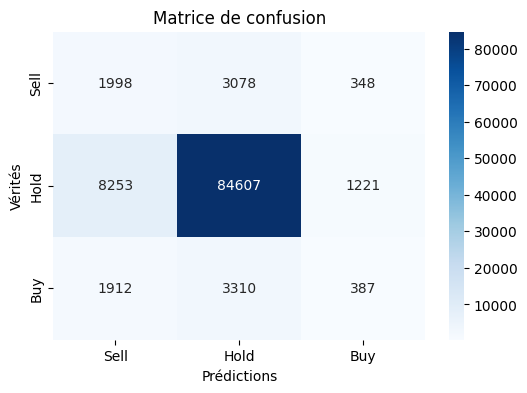

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Évaluation sur le test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_classes, target_names=["Sell", "Hold", "Buy"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Sell","Hold","Buy"],
            yticklabels=["Sell","Hold","Buy"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()


# Étape 7: Filtrage de confiance (post-prédiction) & sauvegarde du modèle

In [34]:
import numpy as np
from sklearn.metrics import classification_report

probas = model.predict(X_test_scaled)
thr_buy = 0.30
thr_sell = 0.30
filtered_pred = []

for p in probas:
    cls = np.argmax(p)
    conf = np.max(p)

    if cls == 2 and conf >= thr_buy:
        filtered_pred.append(2)  # Buy
    elif cls == 0 and conf >= thr_sell:
        filtered_pred.append(0)  # Sell
    else:
        filtered_pred.append(1)  # Hold

# Affichage du rapport après la boucle
print(classification_report(y_test, filtered_pred, target_names=["Sell","Hold","Buy"]))


3285/3285 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step
              precision    recall  f1-score   support

        Sell       0.16      0.37      0.23      5424
        Hold       0.93      0.90      0.91     94081
         Buy       0.20      0.07      0.10      5609

    accuracy                           0.83    105114
   macro avg       0.43      0.45      0.41    105114
weighted avg       0.85      0.83      0.84    105114



In [35]:
# ✅ Sauvegarde du modèle avec la focal loss enregistrée
model.save(
    "Models/LSTM_trading_vFinal.keras",
    include_optimizer=True
)

# ✅ Sauvegarde du scaler (pour l'inférence future)
import joblib
joblib.dump(scalers, "Models/scalers_vFinal.pkl")

print("✅ Modèle et scalers sauvegardés avec succès dans Google Drive !")


✅ Modèle et scalers sauvegardés avec succès dans Google Drive !


# Étape 8 — Réutilisation sur de nouvelles données




Importation et chargement du modèle + scalers

In [36]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from binance.client import Client
import ta  # pour les indicateurs techniques

# Charger le modèle et le scaler
model = load_model(
    "Models/LSTM_trading_vFinal.keras",
    custom_objects={"focal_loss": focal_loss}  # très important pour éviter l'erreur
)
scalers = joblib.load("Models/scalers_vFinal.pkl")

print("✅ Modèle et scalers rechargés avec succès !")

# Connexion à l’API Binance
api_key = "PqWDcxYeUa8Korf4oaXEXHbagUzt75RMf2VV6Cy89lgy2aJwZPLNW54UZVaEDmz6"
api_secret = "7AnnuEDLtlYSFRQruTGqHUjsJuW6Z5ywmtvpCokCGV48Ebi3cY24fkNJ5VzCrDzB"
client = Client(api_key, api_secret)

✅ Modèle et scalers rechargés avec succès !


In [37]:
# Gestion simplifiee des positions par symbole
position_state = {}


def reset_position_state(symbol=None):
    """Reinitialise l'etat des positions (utile pour les tests)."""
    global position_state
    if symbol is None:
        position_state = {}
    else:
        position_state.pop(symbol, None)



Fonction pour récupérer les données récentes de Binance

In [38]:
def get_latest_data(symbol="BTCUSDT", interval="1m", lookback=200):
    """Télécharge les dernières données OHLCV depuis Binance"""
    klines = client.get_klines(symbol=symbol, interval=interval, limit=lookback)

    df = pd.DataFrame(klines, columns=[
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "num_trades",
        "taker_buy_base", "taker_buy_quote", "ignore"
    ])

    # Garder uniquement les colonnes pertinentes
    df = df[["open_time", "open", "high", "low", "close", "volume"]]

    # Conversion des types numériques
    df[["open", "high", "low", "close", "volume"]] = df[["open", "high", "low", "close", "volume"]].astype(float)

    # Conversion du temps
    df["timestamp"] = pd.to_datetime(df["open_time"], unit="ms")
    df = df[["timestamp", "open", "high", "low", "close", "volume"]]

    return df


Fonction de prétraitement automatique (identique à l'entraînement)

In [39]:
def preprocess_live_data(df, seq_len=20):
    # --- Calcul des indicateurs techniques identiques à l'entraînement ---
    df["EMA_20"] = ta.trend.ema_indicator(df["close"], window=20)
    df["RSI_14"] = ta.momentum.rsi(df["close"], window=14)

    bb = ta.volatility.BollingerBands(df["close"], window=20, window_dev=2)
    df["BB_middle"] = bb.bollinger_mavg()
    df["BB_upper"] = bb.bollinger_hband()
    df["BB_lower"] = bb.bollinger_lband()
    df["BB_std"] = df["close"].rolling(window=20).std()  # ⚠️ correcte maintenant

    # MACD
    macd = ta.trend.MACD(df["close"])
    df["macd"] = macd.macd()
    df["macd_signal"] = macd.macd_signal()
    df["macd_hist"] = macd.macd_diff()

    # ADX
    adx = ta.trend.ADXIndicator(df["high"], df["low"], df["close"], window=14)
    df["adx"] = adx.adx()

    # Stochastic Oscillator
    stoch = ta.momentum.StochasticOscillator(df["high"], df["low"], df["close"], window=14, smooth_window=3)
    df["sto_k"] = stoch.stoch()
    df["sto_d"] = stoch.stoch_signal()

    # ATR
    atr = ta.volatility.AverageTrueRange(df["high"], df["low"], df["close"], window=14)
    df["atr_14"] = atr.average_true_range()

    df = df.dropna()

    # --- Création de la dernière séquence pour prédiction ---
    features = [
        "open","high","low","close","volume",
        "EMA_20","RSI_14","BB_middle","BB_std","BB_upper","BB_lower",
        "macd","macd_signal","macd_hist","adx","sto_k","sto_d","atr_14"
    ]
    X_seq = df[features].values[-seq_len:].reshape(1, seq_len, len(features))

    # --- Normalisation avec les scalers sauvegardés ---
    X_seq_scaled = np.zeros_like(X_seq)
    for i, scaler in enumerate(scalers):
        X_seq_scaled[:, :, i] = scaler.transform(X_seq[:, :, i])

    return X_seq_scaled


Fonction de prédiction automatique

In [40]:
def predict_signal(symbol="BTCUSDT", seq_len=20, confidence_threshold=0.001,
                   buy_threshold=0.6, sell_threshold=0.6):
    """
    Prédit un signal autonome (Buy -> Sell) :
    - on n'ouvre une position (Buy) que lorsque le symbole est flat
    - on ne clôture (Sell) que lorsqu'une position est ouverte
    """
    global position_state

    try:
        df_live = get_latest_data(symbol, interval="1m", lookback=200)
        X_live = preprocess_live_data(df_live, seq_len=seq_len)

        probas = model.predict(X_live)
        conf = float(probas.max(axis=1)[0])
        pred_class = int(probas.argmax(axis=1)[0])

        mapping = {0: "Sell", 1: "Hold", 2: "Buy"}
        raw_decision = mapping.get(pred_class, "Hold")
        state = position_state.get(symbol, "flat")
        decision = raw_decision

        if conf < confidence_threshold:
            decision = "Hold (low confidence)"
        else:
            if state == "flat":
                if raw_decision == "Buy" and conf >= buy_threshold:
                    position_state[symbol] = "long"
                    decision = "Buy (opening position)"
                else:
                    decision = "Hold (waiting buy)"
            elif state == "long":
                if raw_decision == "Sell" and conf >= sell_threshold:
                    position_state[symbol] = "flat"
                    decision = "Sell (closing position)"
                else:
                    decision = "Hold (position open)"
            else:
                # état inconnu → reset
                position_state[symbol] = "flat"
                decision = "Hold (state reset)"

        current_state = position_state.get(symbol, state)
        print(f"🪙 {symbol} → {decision}  |  Confiance: {conf:.2f}  |  Etat: {current_state}")
        return decision, conf

    except Exception as e:
        print(f"⚠️ Erreur pendant la prédiction pour {symbol} : {e}")
        return None, None


## Test multi-symbole & rapport Excel
Ce bloc permet de lancer un test automatique sur plusieurs paires Binance, enchaîner les signaux Buy→Sell pour chaque symbole et consigner chaque opération (prix, confiance, PnL) dans un rapport Excel.


In [41]:
import os

FEATURE_COLUMNS = [
    "open","high","low","close","volume",
    "EMA_20","RSI_14","BB_middle","BB_std","BB_upper","BB_lower",
    "macd","macd_signal","macd_hist","adx","sto_k","sto_d","atr_14"
]


def list_trading_symbols(quote="USDT", max_symbols=None):
    """Récupère les paires Binance actives pour une quote donnée."""
    try:
        info = client.get_exchange_info()
    except Exception as e:
        print(f"⚠️ Impossible de récupérer les symboles : {e}")
        return []

    symbols = []
    for s in info.get("symbols", []):
        if s.get("status") != "TRADING":
            continue
        if quote and s.get("quoteAsset") != quote:
            continue
        permissions = s.get("permissions", [])
        if permissions and "SPOT" not in permissions:
            continue
        symbols.append(s["symbol"])

    symbols = sorted(set(symbols))
    if max_symbols:
        symbols = symbols[:max_symbols]
    print(f"🔎 {len(symbols)} symboles retenus (quote={quote}).")
    return symbols


def _add_indicators(df):
    df = df.copy()
    df["EMA_20"] = ta.trend.ema_indicator(df["close"], window=20)
    df["RSI_14"] = ta.momentum.rsi(df["close"], window=14)

    bb = ta.volatility.BollingerBands(df["close"], window=20, window_dev=2)
    df["BB_middle"] = bb.bollinger_mavg()
    df["BB_upper"] = bb.bollinger_hband()
    df["BB_lower"] = bb.bollinger_lband()
    df["BB_std"] = df["close"].rolling(window=20).std()

    macd = ta.trend.MACD(df["close"])
    df["macd"] = macd.macd()
    df["macd_signal"] = macd.macd_signal()
    df["macd_hist"] = macd.macd_diff()

    adx = ta.trend.ADXIndicator(df["high"], df["low"], df["close"], window=14)
    df["adx"] = adx.adx()

    stoch = ta.momentum.StochasticOscillator(df["high"], df["low"], df["close"], window=14, smooth_window=3)
    df["sto_k"] = stoch.stoch()
    df["sto_d"] = stoch.stoch_signal()

    atr = ta.volatility.AverageTrueRange(df["high"], df["low"], df["close"], window=14)
    df["atr_14"] = atr.average_true_range()

    return df.dropna().reset_index(drop=True)


def prepare_sequences_for_backtest(df_raw, seq_len=20):
    df = _add_indicators(df_raw)
    if len(df) <= seq_len:
        return None, None, None

    data = df[FEATURE_COLUMNS].values
    sequences = []
    for i in range(seq_len, len(data)):
        sequences.append(data[i-seq_len:i])

    X_seq = np.stack(sequences)
    X_seq_scaled = np.zeros_like(X_seq)

    for feat_idx, scaler in enumerate(scalers):
        X_seq_scaled[:, :, feat_idx] = scaler.transform(X_seq[:, :, feat_idx])

    closes = df["close"].values[seq_len:]
    timestamps = df["timestamp"].values[seq_len:]
    return X_seq_scaled, closes, timestamps


def simulate_symbol_trades(symbol, interval="1m", lookback=720, seq_len=20,
                            confidence_threshold=0.3, buy_threshold=0.65, sell_threshold=0.65,
                            stop_loss_pct=None, take_profit_pct=None, verbose=False):
    """
    Simule les enchaînements Buy→Sell sur un symbole et renvoie les trades.
    
    Args:
        stop_loss_pct: Pourcentage de perte maximum (ex: 0.5 = -0.5%). Si None, pas de stop loss.
        take_profit_pct: Pourcentage de profit cible (ex: 1.0 = +1.0%). Si None, pas de take profit.
    """
    try:
        df_raw = get_latest_data(symbol=symbol, interval=interval, lookback=lookback)
    except Exception as e:
        print(f"⚠️ {symbol} : impossible de télécharger les données ({e})")
        return []

    X_seq, closes, timestamps = prepare_sequences_for_backtest(df_raw, seq_len=seq_len)
    if X_seq is None:
        print(f"⚠️ {symbol} : pas assez de données après indicateurs.")
        return []

    probas = model.predict(X_seq, verbose=0)
    trades = []
    state = "flat"
    entry_price = entry_time = entry_conf = None
    
    # Stats pour diagnostic
    stats = {"total": len(probas), "buy_signals": 0, "sell_signals": 0, "hold_signals": 0,
             "buy_above_thresh": 0, "sell_above_thresh": 0, "low_conf": 0,
             "stop_loss_hits": 0, "take_profit_hits": 0, "signal_exits": 0}

    for prob, price, ts in zip(probas, closes, timestamps):
        conf = float(prob.max())
        pred = int(prob.argmax())
        
        # Stats
        if conf < confidence_threshold:
            stats["low_conf"] += 1
            continue
        
        if pred == 2:
            stats["buy_signals"] += 1
            if conf >= buy_threshold:
                stats["buy_above_thresh"] += 1
        elif pred == 0:
            stats["sell_signals"] += 1
            if conf >= sell_threshold:
                stats["sell_above_thresh"] += 1
        else:
            stats["hold_signals"] += 1

        if state == "flat":
            if pred == 2 and conf >= buy_threshold:
                state = "long"
                entry_price = price
                entry_time = pd.to_datetime(ts)
                entry_conf = conf
        elif state == "long":
            # Calculer le PnL actuel
            current_pnl_pct = (price - entry_price) / entry_price * 100.0
            
            # Vérifier stop loss
            exit_reason = None
            exit_price = price
            exit_conf = conf
            
            if stop_loss_pct is not None and current_pnl_pct <= -stop_loss_pct:
                exit_reason = "stop_loss"
                stats["stop_loss_hits"] += 1
            # Vérifier take profit
            elif take_profit_pct is not None and current_pnl_pct >= take_profit_pct:
                exit_reason = "take_profit"
                stats["take_profit_hits"] += 1
            # Vérifier signal Sell
            elif pred == 0 and conf >= sell_threshold:
                exit_reason = "signal_sell"
                stats["signal_exits"] += 1
            
            # Fermer la position si une condition est remplie
            if exit_reason:
                trades.append({
                    "symbol": symbol,
                    "buy_time": entry_time,
                    "buy_price": entry_price,
                    "buy_conf": entry_conf,
                    "sell_time": pd.to_datetime(ts),
                    "sell_price": exit_price,
                    "sell_conf": exit_conf,
                    "pnl_pct": current_pnl_pct,
                    "pnl_quote": exit_price - entry_price,
                    "exit_reason": exit_reason
                })
                state = "flat"
                entry_price = entry_time = entry_conf = None

    if verbose:
        print(f"📊 {symbol} - Total: {stats['total']} | Buy: {stats['buy_signals']} (≥{buy_threshold}: {stats['buy_above_thresh']}) | "
              f"Sell: {stats['sell_signals']} (≥{sell_threshold}: {stats['sell_above_thresh']}) | "
              f"Hold: {stats['hold_signals']} | Low conf: {stats['low_conf']} | "
              f"Stop Loss: {stats['stop_loss_hits']} | Take Profit: {stats['take_profit_hits']} | "
              f"Signal Exit: {stats['signal_exits']} | Trades: {len(trades)}")
    
    return trades


def run_multi_symbol_test(quote="USDT", max_symbols=25, interval="1m", lookback=720,
                          seq_len=20, excel_path="Reports/binance_trades_report.xlsx",
                          confidence_threshold=0.3, buy_threshold=0.65, sell_threshold=0.65,
                          stop_loss_pct=None, take_profit_pct=None,
                          verbose=True, symbols_list=None):
    """
    Lance le test multi-symbole.
    
    Args:
        symbols_list: Liste personnalisée de symboles (ex: ["BTCUSDT", "ETHUSDT"]).
                     Si None, utilise list_trading_symbols() pour récupérer automatiquement.
        stop_loss_pct: Pourcentage de perte maximum (ex: 0.5 = -0.5%). Si None, pas de stop loss.
        take_profit_pct: Pourcentage de profit cible (ex: 1.0 = +1.0%). Si None, pas de take profit.
    """
    if symbols_list is not None:
        symbols = symbols_list
        print(f"🔎 Utilisation de {len(symbols)} symboles personnalisés: {symbols}")
    else:
        symbols = list_trading_symbols(quote=quote, max_symbols=max_symbols)
    
    if not symbols:
        print("⚠️ Aucun symbole disponible pour ce filtre.")
        return pd.DataFrame(), pd.DataFrame()

    all_trades = []
    for sym in symbols:
        trades = simulate_symbol_trades(
            sym,
            interval=interval,
            lookback=lookback,
            seq_len=seq_len,
            confidence_threshold=confidence_threshold,
            buy_threshold=buy_threshold,
            sell_threshold=sell_threshold,
            stop_loss_pct=stop_loss_pct,
            take_profit_pct=take_profit_pct,
            verbose=verbose,
        )
        all_trades.extend(trades)

    if not all_trades:
        print("⚠️ Aucun trade généré sur cet échantillon.")
        return pd.DataFrame(), pd.DataFrame()

    trades_df = pd.DataFrame(all_trades)
    trades_df["is_win"] = trades_df["pnl_quote"] > 0
    
    # Ajouter une colonne exit_reason si elle n'existe pas (pour compatibilité)
    if "exit_reason" not in trades_df.columns:
        trades_df["exit_reason"] = "signal_sell"

    summary_df = trades_df.groupby("symbol").agg(
        trades_count=("symbol", "count"),
        win_rate_pct=("is_win", lambda x: round(100 * x.mean(), 2)),
        total_pnl_quote=("pnl_quote", "sum"),
        total_pnl_pct=("pnl_pct", "sum"),
        stop_loss_count=("exit_reason", lambda x: (x == "stop_loss").sum()),
        take_profit_count=("exit_reason", lambda x: (x == "take_profit").sum()),
        signal_exit_count=("exit_reason", lambda x: (x == "signal_sell").sum()),
    ).reset_index()

    os.makedirs(os.path.dirname(excel_path), exist_ok=True)
    with pd.ExcelWriter(excel_path) as writer:
        trades_df.to_excel(writer, sheet_name="operations", index=False)
        summary_df.to_excel(writer, sheet_name="resume", index=False)

    print(f"✅ Rapport enregistré dans {excel_path} ({len(trades_df)} opérations)")
    return trades_df, summary_df



## Exécution en boucle continue (chaque minute)
Cette cellule lance le test multi-symbole en continu, avec une exécution toutes les minutes.


In [42]:
import time
from datetime import datetime

def run_continuous_test(quote="USDT", max_symbols=10, interval="1m", lookback=720,
                        seq_len=20, base_excel_path="Reports/binance_trades_report",
                        confidence_threshold=0.3, buy_threshold=0.55, sell_threshold=0.55,
                        stop_loss_pct=None, take_profit_pct=None,
                        loop_interval_seconds=60, max_iterations=None, symbols_list=None):
    """
    Exécute le test multi-symbole en boucle continue toutes les N secondes.
    
    Args:
        loop_interval_seconds: Intervalle entre chaque exécution (défaut: 60 = 1 minute)
        max_iterations: Nombre maximum d'itérations (None = infini, arrêter avec Ctrl+C)
        symbols_list: Liste personnalisée de symboles (ex: ["BTCUSDT", "ETHUSDT"]).
                     Si None, utilise list_trading_symbols() pour récupérer automatiquement.
        stop_loss_pct: Pourcentage de perte maximum (ex: 0.5 = -0.5%). Si None, pas de stop loss.
        take_profit_pct: Pourcentage de profit cible (ex: 1.0 = +1.0%). Si None, pas de take profit.
    """
    iteration = 0
    
    print(f"🔄 Démarrage du test en boucle (intervalle: {loop_interval_seconds}s)")
    print("⚠️ Appuyez sur Ctrl+C pour arrêter\n")
    
    try:
        while True:
            iteration += 1
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            excel_path = f"{base_excel_path}_{timestamp}.xlsx"
            
            print(f"\n{'='*60}")
            print(f"📅 Itération #{iteration} - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            print(f"{'='*60}\n")
            
            trades_df, summary_df = run_multi_symbol_test(
                quote=quote,
                max_symbols=max_symbols,
                interval=interval,
                lookback=lookback,
                seq_len=seq_len,
                excel_path=excel_path,
                confidence_threshold=confidence_threshold,
                buy_threshold=buy_threshold,
                sell_threshold=sell_threshold,
                stop_loss_pct=stop_loss_pct,
                take_profit_pct=take_profit_pct,
                verbose=True,
                symbols_list=symbols_list,
            )
            
            if not trades_df.empty:
                print(f"\n✅ {len(trades_df)} trades générés dans cette itération")
                print(f"📊 Win rate global: {100 * trades_df['is_win'].mean():.2f}%")
                print(f"💰 PnL total: {trades_df['pnl_quote'].sum():.4f} USDT")
                
                # Afficher les stats par type de sortie si disponible
                if "exit_reason" in trades_df.columns:
                    exit_stats = trades_df["exit_reason"].value_counts()
                    print(f"🔚 Sorties: {dict(exit_stats)}")
            else:
                print("\n⚠️ Aucun trade généré dans cette itération")
            
            if max_iterations and iteration >= max_iterations:
                print(f"\n✅ Nombre maximum d'itérations ({max_iterations}) atteint. Arrêt.")
                break
            
            print(f"\n⏳ Attente de {loop_interval_seconds} secondes avant la prochaine itération...")
            time.sleep(loop_interval_seconds)
            
    except KeyboardInterrupt:
        print(f"\n\n🛑 Arrêt demandé par l'utilisateur après {iteration} itération(s)")
    except Exception as e:
        print(f"\n\n❌ Erreur pendant l'exécution: {e}")
        raise
    
    return trades_df, summary_df



In [43]:
# Exemple 1 : Test sur symboles connus avec Stop Loss et Take Profit
# Pour arrêter : Interrompez l'exécution de la cellule (Ctrl+C ou bouton Stop)

known_symbols = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "ADAUSDT", "SOLUSDT"]

run_continuous_test(
    symbols_list=known_symbols,  # Liste personnalisée de symboles
    interval="1m",
    lookback=720,
    seq_len=20,
    base_excel_path="Reports/binance_trades_report",
    confidence_threshold=0.3,
    buy_threshold=0.40,
    sell_threshold=0.40,
    stop_loss_pct=0.5,      # Stop Loss à -0.5% (ferme si perte >= 0.5%)
    take_profit_pct=1.0,     # Take Profit à +1.0% (ferme si profit >= 1.0%)
    loop_interval_seconds=60,  # 60 secondes = 1 minute
    max_iterations=None,       # None = infini (arrêter avec Ctrl+C)
)

# Exemple 2 : Test automatique sur les premiers symboles USDT (ancien comportement)
# run_continuous_test(
#     quote="USDT",
#     max_symbols=10,
#     interval="1m",
#     lookback=720,
#     seq_len=20,
#     base_excel_path="Reports/binance_trades_report",
#     confidence_threshold=0.3,
#     buy_threshold=0.55,
#     sell_threshold=0.55,
#     stop_loss_pct=0.5,
#     take_profit_pct=1.0,
#     loop_interval_seconds=60,
#     max_iterations=None,
# )

# Exemple 3 : Test unique (sans boucle) sur symboles connus avec Stop Loss/Take Profit
# trades_df, summary_df = run_multi_symbol_test(
#     symbols_list=["BTCUSDT", "ETHUSDT"],
#     interval="1m",
#     lookback=720,
#     excel_path="Reports/binance_trades_report.xlsx",
#     confidence_threshold=0.3,
#     buy_threshold=0.55,
#     sell_threshold=0.55,
#     stop_loss_pct=0.5,      # Stop Loss à -0.5%
#     take_profit_pct=1.0,     # Take Profit à +1.0%
# )



🔄 Démarrage du test en boucle (intervalle: 60s)
⚠️ Appuyez sur Ctrl+C pour arrêter


📅 Itération #1 - 2025-11-18 23:33:37

🔎 Utilisation de 5 symboles personnalisés: ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'SOLUSDT']
📊 BTCUSDT - Total: 667 | Buy: 382 (≥0.4: 88) | Sell: 214 (≥0.4: 153) | Hold: 71 | Low conf: 0 | Stop Loss: 1 | Take Profit: 0 | Signal Exit: 8 | Trades: 9
📊 ETHUSDT - Total: 667 | Buy: 585 (≥0.4: 400) | Sell: 77 (≥0.4: 48) | Hold: 5 | Low conf: 0 | Stop Loss: 9 | Take Profit: 4 | Signal Exit: 14 | Trades: 27
📊 BNBUSDT - Total: 667 | Buy: 495 (≥0.4: 112) | Sell: 82 (≥0.4: 44) | Hold: 90 | Low conf: 0 | Stop Loss: 4 | Take Profit: 0 | Signal Exit: 14 | Trades: 18
📊 ADAUSDT - Total: 667 | Buy: 667 (≥0.4: 667) | Sell: 0 (≥0.4: 0) | Hold: 0 | Low conf: 0 | Stop Loss: 8 | Take Profit: 6 | Signal Exit: 0 | Trades: 14
📊 SOLUSDT - Total: 667 | Buy: 667 (≥0.4: 667) | Sell: 0 (≥0.4: 0) | Hold: 0 | Low conf: 0 | Stop Loss: 12 | Take Profit: 8 | Signal Exit: 0 | Trades: 20
✅ Rappo

(     symbol            buy_time  buy_price  buy_conf           sell_time  \
 0   BTCUSDT 2025-11-18 13:33:00   91212.41  0.402244 2025-11-18 13:38:00   
 1   BTCUSDT 2025-11-18 13:49:00   91280.34  0.401004 2025-11-18 14:28:00   
 2   BTCUSDT 2025-11-18 14:32:00   92111.89  0.418081 2025-11-18 14:34:00   
 3   BTCUSDT 2025-11-18 14:44:00   91471.24  0.453640 2025-11-18 15:04:00   
 4   BTCUSDT 2025-11-18 15:36:00   92488.23  0.453651 2025-11-18 15:39:00   
 ..      ...                 ...        ...       ...                 ...   
 80  SOLUSDT 2025-11-18 16:19:00     140.80  0.545434 2025-11-18 17:25:00   
 81  SOLUSDT 2025-11-18 17:26:00     139.93  0.538517 2025-11-18 18:47:00   
 82  SOLUSDT 2025-11-18 18:48:00     141.44  0.534268 2025-11-18 21:07:00   
 83  SOLUSDT 2025-11-18 21:08:00     140.61  0.528624 2025-11-18 21:47:00   
 84  SOLUSDT 2025-11-18 21:48:00     139.79  0.529999 2025-11-18 22:25:00   
 
     sell_price  sell_conf   pnl_pct  pnl_quote  exit_reason  is_win  
 0 

## Analyse des données pour optimiser Stop Loss et Take Profit
Cette section analyse les données de trading réelles pour suggérer des valeurs optimales de SL et TP.


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trading_data_for_sl_tp(trades_df, show_plots=True):
    """
    Analyse les données de trading pour suggérer des valeurs optimales de Stop Loss et Take Profit.
    
    Args:
        trades_df: DataFrame contenant les trades avec colonnes 'pnl_pct', 'pnl_quote', 'is_win'
        show_plots: Afficher les graphiques d'analyse
    
    Returns:
        dict: Dictionnaire avec les recommandations de SL et TP
    """
    if trades_df.empty:
        print("⚠️ Aucune donnée à analyser.")
        return None
    
    # Statistiques de base
    total_trades = len(trades_df)
    win_rate = trades_df['is_win'].mean() * 100
    avg_win = trades_df[trades_df['is_win']]['pnl_pct'].mean()
    avg_loss = trades_df[~trades_df['is_win']]['pnl_pct'].mean()
    
    print("="*60)
    print("📊 ANALYSE DES DONNÉES DE TRADING")
    print("="*60)
    print(f"Total trades: {total_trades}")
    print(f"Win rate: {win_rate:.2f}%")
    print(f"Trades gagnants: {trades_df['is_win'].sum()}")
    print(f"Trades perdants: {(~trades_df['is_win']).sum()}")
    print(f"\nPnL moyen (gagnants): {avg_win:.3f}%")
    print(f"PnL moyen (perdants): {avg_loss:.3f}%")
    
    # Analyse des pertes
    losing_trades = trades_df[~trades_df['is_win']]['pnl_pct']
    if len(losing_trades) > 0:
        loss_percentiles = {
            'p25': losing_trades.quantile(0.25),
            'p50': losing_trades.quantile(0.50),
            'p75': losing_trades.quantile(0.75),
            'p90': losing_trades.quantile(0.90),
            'p95': losing_trades.quantile(0.95),
            'max': losing_trades.min()  # La pire perte
        }
        
        print(f"\n📉 ANALYSE DES PERTES:")
        print(f"  Pire perte: {loss_percentiles['max']:.3f}%")
        print(f"  Percentile 95%: {loss_percentiles['p95']:.3f}%")
        print(f"  Percentile 90%: {loss_percentiles['p90']:.3f}%")
        print(f"  Percentile 75%: {loss_percentiles['p75']:.3f}%")
        print(f"  Médiane: {loss_percentiles['p50']:.3f}%")
        
        # Recommandation Stop Loss
        # Utiliser le percentile 90 ou 95 pour couvrir la majorité des pertes
        recommended_sl = abs(loss_percentiles['p90'])
        # Ajuster pour être un peu plus strict que la médiane
        if abs(loss_percentiles['p50']) < recommended_sl:
            recommended_sl = max(abs(loss_percentiles['p50']) * 1.5, abs(loss_percentiles['p90']))
        
        # S'assurer que le SL n'est pas trop large (max 2%)
        recommended_sl = min(recommended_sl, 2.0)
        # Et pas trop serré (min 0.2%)
        recommended_sl = max(recommended_sl, 0.2)
    else:
        recommended_sl = 0.5  # Valeur par défaut si pas de trades perdants
    
    # Analyse des profits
    winning_trades = trades_df[trades_df['is_win']]['pnl_pct']
    if len(winning_trades) > 0:
        profit_percentiles = {
            'p25': winning_trades.quantile(0.25),
            'p50': winning_trades.quantile(0.50),
            'p75': winning_trades.quantile(0.75),
            'p90': winning_trades.quantile(0.90),
            'p95': winning_trades.quantile(0.95),
            'min': winning_trades.min()  # Le plus petit profit
        }
        
        print(f"\n📈 ANALYSE DES PROFITS:")
        print(f"  Plus petit profit: {profit_percentiles['min']:.3f}%")
        print(f"  Percentile 25%: {profit_percentiles['p25']:.3f}%")
        print(f"  Médiane: {profit_percentiles['p50']:.3f}%")
        print(f"  Percentile 75%: {profit_percentiles['p75']:.3f}%")
        print(f"  Percentile 90%: {profit_percentiles['p90']:.3f}%")
        
        # Recommandation Take Profit
        # Utiliser le percentile 50 (médiane) pour sécuriser la majorité des profits
        recommended_tp = profit_percentiles['p50']
        # Ajuster pour être un peu plus conservateur
        if recommended_tp < 0.5:
            recommended_tp = max(profit_percentiles['p25'] * 1.5, 0.5)
        else:
            recommended_tp = profit_percentiles['p50'] * 0.8  # 80% de la médiane pour sécuriser
        
        # S'assurer que le TP n'est pas trop petit (min 0.3%)
        recommended_tp = max(recommended_tp, 0.3)
        # Et pas trop grand (max 5%)
        recommended_tp = min(recommended_tp, 5.0)
    else:
        recommended_tp = 1.0  # Valeur par défaut si pas de trades gagnants
    
    # Ratio Risk/Reward
    risk_reward_ratio = recommended_tp / recommended_sl
    
    print(f"\n💡 RECOMMANDATIONS:")
    print(f"  Stop Loss suggéré: {recommended_sl:.2f}%")
    print(f"  Take Profit suggéré: {recommended_tp:.2f}%")
    print(f"  Ratio Risk/Reward: {risk_reward_ratio:.2f}")
    
    if risk_reward_ratio < 1.0:
        print(f"  ⚠️ Attention: Ratio < 1.0 (risque élevé par rapport à la récompense)")
    elif risk_reward_ratio >= 2.0:
        print(f"  ✅ Excellent ratio Risk/Reward")
    
    # Simulation de l'impact
    print(f"\n🔮 SIMULATION AVEC SL={recommended_sl:.2f}% et TP={recommended_tp:.2f}%:")
    
    # Simuler combien de trades auraient été fermés par SL/TP
    sl_hits = (trades_df['pnl_pct'] <= -recommended_sl).sum()
    tp_hits = (trades_df['pnl_pct'] >= recommended_tp).sum()
    
    print(f"  Trades qui auraient touché le Stop Loss: {sl_hits} ({100*sl_hits/total_trades:.1f}%)")
    print(f"  Trades qui auraient touché le Take Profit: {tp_hits} ({100*tp_hits/total_trades:.1f}%)")
    
    # Calculer le PnL théorique avec SL/TP
    simulated_pnl = trades_df['pnl_pct'].copy()
    simulated_pnl[trades_df['pnl_pct'] <= -recommended_sl] = -recommended_sl
    simulated_pnl[trades_df['pnl_pct'] >= recommended_tp] = recommended_tp
    
    original_total_pnl = trades_df['pnl_pct'].sum()
    simulated_total_pnl = simulated_pnl.sum()
    improvement = simulated_total_pnl - original_total_pnl
    
    print(f"  PnL total original: {original_total_pnl:.2f}%")
    print(f"  PnL total simulé: {simulated_total_pnl:.2f}%")
    print(f"  Amélioration: {improvement:+.2f}%")
    
    if show_plots:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Distribution des PnL
        axes[0, 0].hist(trades_df['pnl_pct'], bins=50, edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(-recommended_sl, color='r', linestyle='--', label=f'SL: -{recommended_sl:.2f}%')
        axes[0, 0].axvline(recommended_tp, color='g', linestyle='--', label=f'TP: +{recommended_tp:.2f}%')
        axes[0, 0].axvline(0, color='black', linestyle='-', alpha=0.3)
        axes[0, 0].set_xlabel('PnL (%)')
        axes[0, 0].set_ylabel('Fréquence')
        axes[0, 0].set_title('Distribution des PnL')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Box plot des pertes vs profits
        data_to_plot = [losing_trades.values if len(losing_trades) > 0 else [],
                       winning_trades.values if len(winning_trades) > 0 else []]
        axes[0, 1].boxplot(data_to_plot, labels=['Pertes', 'Profits'])
        axes[0, 1].axhline(-recommended_sl, color='r', linestyle='--', label=f'SL: -{recommended_sl:.2f}%')
        axes[0, 1].axhline(recommended_tp, color='g', linestyle='--', label=f'TP: +{recommended_tp:.2f}%')
        axes[0, 1].set_ylabel('PnL (%)')
        axes[0, 1].set_title('Distribution Perte vs Profit')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Cumul des PnL
        axes[1, 0].plot(trades_df['pnl_pct'].cumsum(), label='Original')
        axes[1, 0].plot(simulated_pnl.cumsum(), label='Avec SL/TP')
        axes[1, 0].set_xlabel('Nombre de trades')
        axes[1, 0].set_ylabel('PnL cumulé (%)')
        axes[1, 0].set_title('Évolution du PnL cumulé')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Comparaison avant/après
        comparison_data = pd.DataFrame({
            'Original': [trades_df['pnl_pct'].sum(), trades_df['pnl_pct'].mean()],
            'Avec SL/TP': [simulated_pnl.sum(), simulated_pnl.mean()]
        }, index=['Total', 'Moyenne'])
        comparison_data.plot(kind='bar', ax=axes[1, 1], color=['#1f77b4', '#2ca02c'])
        axes[1, 1].set_ylabel('PnL (%)')
        axes[1, 1].set_title('Comparaison PnL Original vs Avec SL/TP')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].tick_params(axis='x', rotation=0)
        
        plt.tight_layout()
        plt.show()
    
    return {
        'stop_loss_pct': round(recommended_sl, 2),
        'take_profit_pct': round(recommended_tp, 2),
        'risk_reward_ratio': round(risk_reward_ratio, 2),
        'sl_hits': sl_hits,
        'tp_hits': tp_hits,
        'improvement_pct': round(improvement, 2)
    }



✅ Fichier chargé : Reports/binance_trades_report_20251118_234059.xlsx
   85 trades trouvés

📊 ANALYSE DES DONNÉES DE TRADING
Total trades: 85
Win rate: 48.24%
Trades gagnants: 41
Trades perdants: 44

PnL moyen (gagnants): 0.655%
PnL moyen (perdants): -0.459%

📉 ANALYSE DES PERTES:
  Pire perte: -0.690%
  Percentile 95%: -0.017%
  Percentile 90%: -0.062%
  Percentile 75%: -0.397%
  Médiane: -0.529%

📈 ANALYSE DES PROFITS:
  Plus petit profit: 0.024%
  Percentile 25%: 0.184%
  Médiane: 0.563%
  Percentile 75%: 1.097%
  Percentile 90%: 1.265%

💡 RECOMMANDATIONS:
  Stop Loss suggéré: 0.20%
  Take Profit suggéré: 0.45%
  Ratio Risk/Reward: 2.25
  ✅ Excellent ratio Risk/Reward

🔮 SIMULATION AVEC SL=0.20% et TP=0.45%:
  Trades qui auraient touché le Stop Loss: 36 (42.4%)
  Trades qui auraient touché le Take Profit: 22 (25.9%)
  PnL total original: 6.66%
  PnL total simulé: 5.66%
  Amélioration: -1.00%


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_6176\1171237908.py:156: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(data_to_plot, labels=['Pertes', 'Profits'])


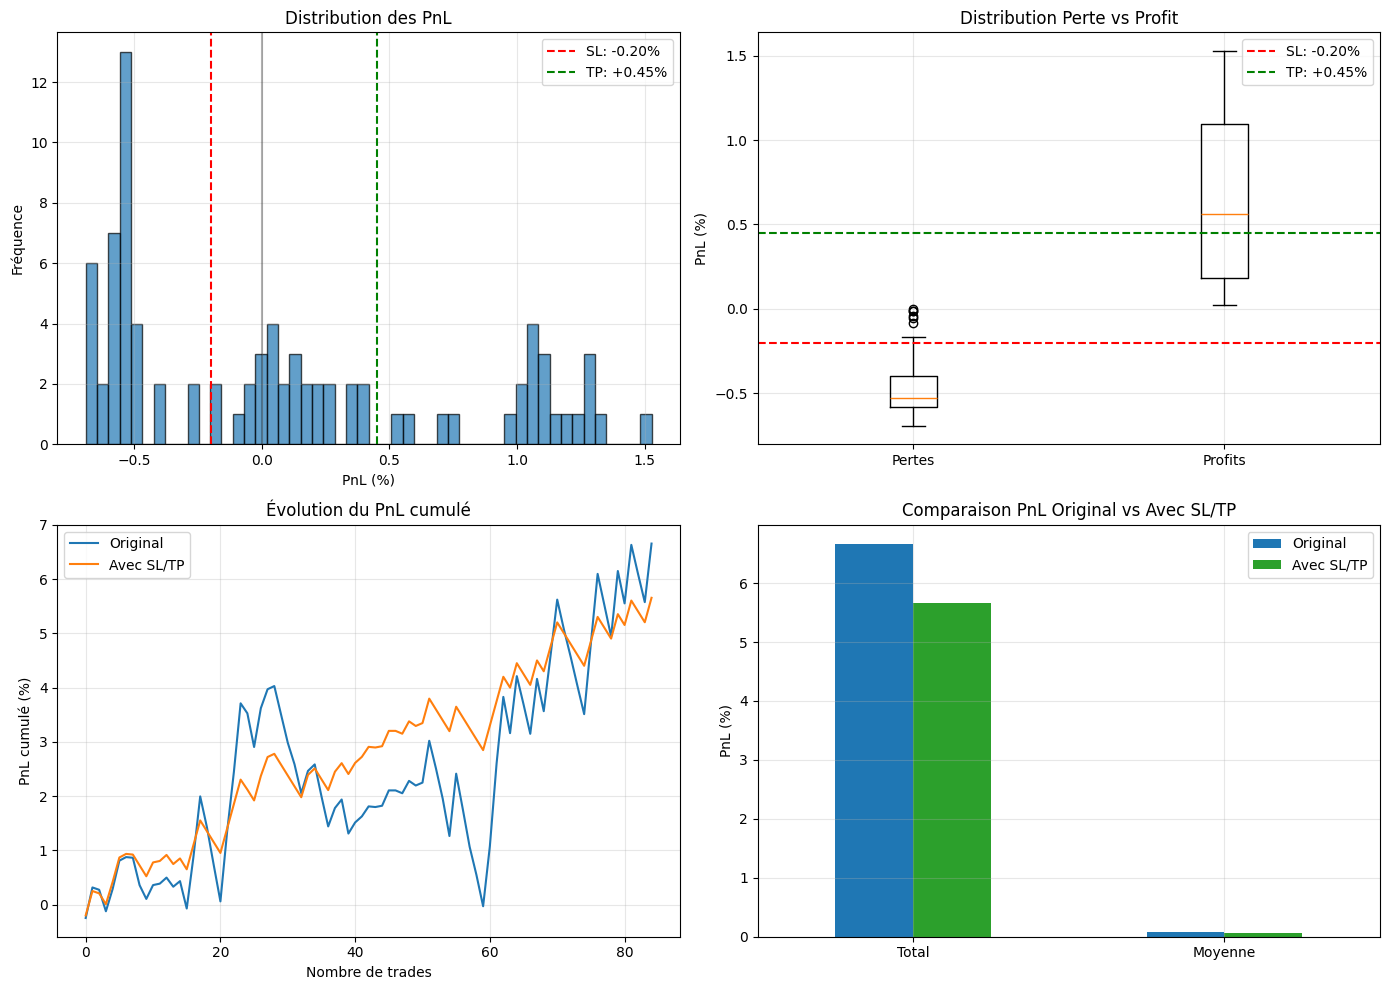

In [48]:
def load_and_analyze_excel(excel_path, show_plots=True):
    """Charge un fichier Excel et analyse les données pour suggérer SL/TP."""
    try:
        trades_df = pd.read_excel(excel_path, sheet_name="operations")
        print(f"✅ Fichier chargé : {excel_path}")
        print(f"   {len(trades_df)} trades trouvés\n")
        recommendations = analyze_trading_data_for_sl_tp(trades_df, show_plots=show_plots)
        return trades_df, recommendations
    except Exception as e:
        print(f"❌ Erreur lors du chargement : {e}")
        return None, None


def analyze_multiple_excel_files(excel_paths, show_plots=False):
    """Analyse plusieurs fichiers Excel et combine les données."""
    all_trades = []
    for path in excel_paths:
        try:
            df = pd.read_excel(path, sheet_name="operations")
            all_trades.append(df)
            print(f"✅ {path}: {len(df)} trades")
        except Exception as e:
            print(f"⚠️ {path}: Erreur - {e}")
    
    if not all_trades:
        print("❌ Aucun fichier valide trouvé.")
        return None, None
    
    combined_df = pd.concat(all_trades, ignore_index=True)
    print(f"\n📊 Total combiné: {len(combined_df)} trades")
    recommendations = analyze_trading_data_for_sl_tp(combined_df, show_plots=show_plots)
    return combined_df, recommendations


# Option 1 : Analyser les données d'un test récent (exécution automatique)
# Si tu viens de lancer un test, utilise directement trades_df
# try:
#     if 'trades_df' in globals() and not trades_df.empty:
#         print("🔄 Analyse automatique des données du dernier test...\n")
#         recommendations = analyze_trading_data_for_sl_tp(trades_df, show_plots=True)
#         print("\n" + "="*60)
#         print("✅ RECOMMANDATIONS POUR TES PROCHAINS TESTS :")
#         print("="*60)
#         print(f"stop_loss_pct={recommendations['stop_loss_pct']}")
#         print(f"take_profit_pct={recommendations['take_profit_pct']}")
#         print(f"risk_reward_ratio={recommendations['risk_reward_ratio']}")
#         print("="*60)
#         print("\n💡 Copie-colle ces valeurs dans tes prochains appels de test :")
#         print(f"run_multi_symbol_test(..., stop_loss_pct={recommendations['stop_loss_pct']}, take_profit_pct={recommendations['take_profit_pct']}, ...)")
#     else:
#         print("ℹ️ Aucune donnée de test récente trouvée.")
#         print("   Lance d'abord un test ou utilise l'Option 2 ci-dessous pour charger un fichier Excel.")
# except NameError:
#     print("ℹ️ Variable 'trades_df' non trouvée.")
#     print("   Lance d'abord un test ou utilise l'Option 2 ci-dessous pour charger un fichier Excel.")
# except Exception as e:
#     print(f"⚠️ Erreur lors de l'analyse : {e}")

# Option 2 : Charger un fichier Excel existant pour analyse
# Décommente et modifie le chemin du fichier :
trades_df_file, recommendations = load_and_analyze_excel(
    "Reports/binance_trades_report_20251118_234059.xlsx",
    show_plots=True
)

# Option 3 : Analyser plusieurs fichiers Excel combinés
# import glob
# excel_files = glob.glob("Reports/binance_trades_report_*.xlsx")
# combined_df, recommendations = analyze_multiple_excel_files(excel_files, show_plots=True)


In [ ]:
# Exemple : Test unique sur symboles connus avec Stop Loss et Take Profit
# Note: Ajustez les seuils selon vos besoins :
# - buy_threshold/sell_threshold plus bas (0.5-0.55) = plus de trades mais moins sélectif
# - buy_threshold/sell_threshold plus haut (0.7+) = moins de trades mais plus sélectif
# - stop_loss_pct : Limite les pertes (ex: 0.5 = -0.5%, 1.0 = -1.0%)
# - take_profit_pct : Sécurise les profits (ex: 1.0 = +1.0%, 2.0 = +2.0%)

known_symbols = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "ADAUSDT", "SOLUSDT"]

trades_df, summary_df = run_multi_symbol_test(
    symbols_list=known_symbols,  # Utilise la liste personnalisée
    interval="1m",
    lookback=720,
    seq_len=20,
    excel_path="Reports/binance_trades_report.xlsx",
    confidence_threshold=0.3,  # Seuil minimum de confiance globale
    buy_threshold=0.45,         # Confiance minimale pour ouvrir une position Buy
    sell_threshold=0.45,        # Confiance minimale pour fermer avec Sell
    stop_loss_pct=0.5,          # Stop Loss à -0.5% (ferme si perte >= 0.5%)
    take_profit_pct=1.0,        # Take Profit à +1.0% (ferme si profit >= 1.0%)
    verbose=True,               # Affiche les stats par symbole
)
summary_df.head()

# Alternative : Test automatique sur les premiers symboles USDT
# trades_df, summary_df = run_multi_symbol_test(
#     quote="USDT",
#     max_symbols=10,
#     interval="1m",
#     lookback=720,
#     seq_len=20,
#     excel_path="Reports/binance_trades_report.xlsx",
#     confidence_threshold=0.3,
#     buy_threshold=0.55,
#     sell_threshold=0.55,
#     stop_loss_pct=0.5,
#     take_profit_pct=1.0,
#     verbose=True,
# )



NameError: name 'run_multi_symbol_test' is not defined

Exécution de test

In [ ]:
predict_signal("BTCUSDT")
predict_signal("ETHUSDT", confidence_threshold=0.75)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
🪙 BTCUSDT → Hold (waiting buy)  |  Confiance: 0.48  |  Etat: flat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🪙 ETHUSDT → Hold (low confidence)  |  Confiance: 0.40  |  Etat: flat


('Hold (low confidence)', 0.40411749482154846)